# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.replace(" ","%20"))

# Print the city count to confirm sufficient count
len(cities)


773

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
name = []
id1 = []
lat = []
lon =[]
temp = []
humidity =[]
cloudy = []
wind = []
url_list = []
dt =[]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        print(city)
        print(response['main']['temp'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all']) 
        wind.append(response['wind']['speed'])
        name.append(response['name'])
        id1.append(response['id'])   
        dt.append(response['dt'])  
#         url_list.append(query_url + city)
#         print(query_url + city)
    except:
        print()
print(len(name))
print(len(id1))
print(len(lat))
print(len(lon))
print(len(temp))
print(len(humidity))
print(len(cloudy))
print(len(wind))

# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")
        

jamestown
27
new%20norfolk
2.22
ponta%20do%20sol
18.67
tura
23.5
cape%20town
16.23
romuli
12.24
barranca
18.52
kapaa
26.25
tiksi
11.18
kahului
28.4
yulara
6
mahebourg
21
klyuchi
13.1
port%20elizabeth
10
karkaralinsk

punta%20arenas
3.94
ushuaia
2
torbay
18.82
ambon
25.98
port%20alfred
16.85
san%20ignacio
27.1
salalah
28
paamiut
4.23
porbandar
29.61
bluff
3.89
vaitape
27.07
chimbote
18.95
rikitea
24.26
meulaboh
25.02
cabo%20san%20lucas
32.36
tuktoyaktuk
6
goundam
36.9
pieszyce
16.22
acapulco
31
pisco
18.71
yanam
26
mataura
3.89
busselton
3.33
thinadhoo
28.83
kodiak
11
angoche
21.05
butaritari
28.51
hasaki
18.23
shimoda
15
weatherford
32.96
arman
13.6
mantua
18.2
korla
23.68
punta%20arenas
3.94
georgetown
26.83
upernavik
2.46
punta%20arenas
3.94
hermanus
10.56
tateyama
18
saint%20anthony
27.72
pangnirtung
2
new%20norfolk
2.22
hobart
2.13
puerto%20ayora
25.06
norman%20wells
26
sanghar
34
taolanaro

tomigusuku
27.94
dingle
23.82
cayenne
27
illoqqortoormiut

vila%20velha
21.82
veraval
29.5


verkhoyansk
26.53
vysokopillya
20
ayan
7.18
port%20alfred
16.85
pitimbu
22
chake%20chake
25.02
zhuhai
28.42
namibe
22.24
revda
2
vynohradove
19.03
nampula
16.39
punta%20arenas
3.94
nador
22.54
boa%20vista
29
eureka
16.93
port%20hardy
18
bambous%20virieux
21.05
buta
21.72
shkotovo-22

neryungri
13.08
posse
19.86
husavik
12
luderitz
22
turki
17.09
vao
22.11
camabatela
16.16
paysandu
13.37
murdochville
30.35
sawtell
12.7
yatou
20.35
rungata

cradock
9.14
batemans%20bay
4.44
jihlava
13.89
cape%20town
16.23
arraial%20do%20cabo
23
menongue
10.09
puerto%20ayora
25.06
kizukuri
18.2
guerrero%20negro
22.61
hvammstangi

punta%20arenas
3.94
key%20west
30.57
nome
12.32
fairview
25.01
sao%20jose%20da%20coroa%20grande
25.33
ribeira%20grande
18
ruatoria

port%20alfred
16.85
hofn
9.59
fereydun%20kenar
25
lincoln
24
zhenhai
28
pokrovsk
19.87
grafton
27.27
bardstown
26.12
burnie
9.48
mlimba
21.9
miyang
19.82
ust-kamchatsk

poum
23.54
lagoa
18.11
kargopol
16.36
vila%20velha
21.82
peleduy
12.2
ribeira%20gr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
weather_dict = {
    "name": name,
    "ID": id1,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humidity": humidity,
    "Cloud Cover": cloudy,
    "Wind Speed": wind,
    "Date": dt
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('weather1.csv', encoding='utf-8', index=False)


In [11]:
wd2 = weather_data[weather_data["humidity"]<100.1]
wd2.head()

,name,ID,lat,lon,temp,humidity,Cloud Cover,Wind Speed
0,Jamestown,5122534,42.10,-79.24,24.00,64,75,2.10
1,New Norfolk,2155415,-42.78,147.06,3.54,85,100,1.20
2,Ponta do Sol,2264557,32.67,-17.10,21.93,60,20,5.10
3,Tura,1254046,25.52,90.22,23.72,98,100,2.06
4,Cape Town,3369157,-33.93,18.42,19.85,40,0,2.10


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

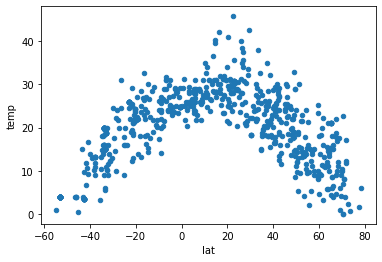

In [13]:
wd2.plot.scatter(x='lat',y='temp')

## Latitude vs. Humidity Plot

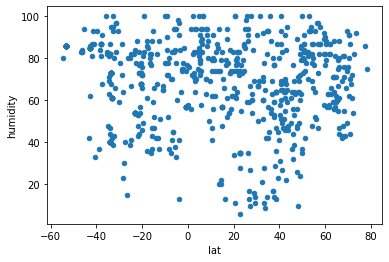

In [14]:
wd2.plot.scatter(x='lat',y='humidity')

## Latitude vs. Cloudiness Plot

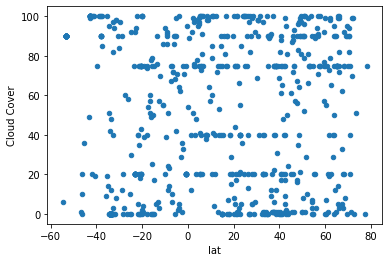

In [17]:
wd2.plot.scatter(x='lat',y='Cloud Cover')

## Latitude vs. Wind Speed Plot

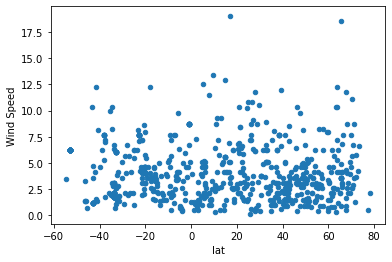

In [18]:
wd2.plot.scatter(x='lat',y='Wind Speed')

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5355416736980888


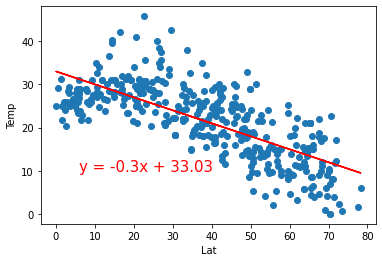

In [21]:
wd3=wd2[wd2['lat']>0]
x_values = wd3['lat']
y_values =wd3['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Temp')
plt.xlabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7115621603101417


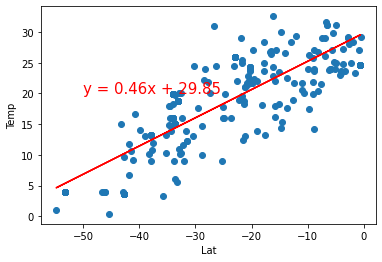

In [26]:
wd3=wd2[wd2['lat']<0]
x_values = wd3['lat']
y_values =wd3['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel('Temp')
plt.xlabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008697418239065167


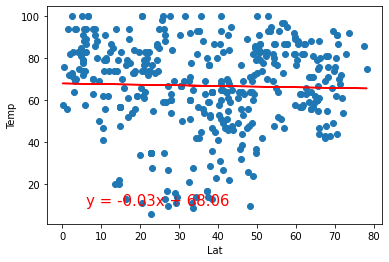

In [33]:
wd3=wd2[wd2['lat']>0]
x_values = wd3['lat']
y_values =wd3['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Temp')
plt.xlabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0702574507485425


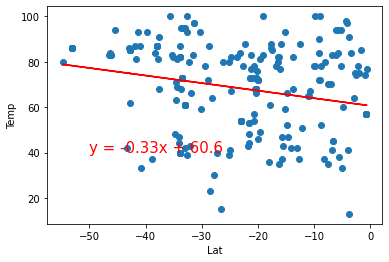

In [36]:
wd3=wd2[wd2['lat']<0]
x_values = wd3['lat']
y_values =wd3['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.ylabel('Temp')
plt.xlabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 8.096781432115693e-05


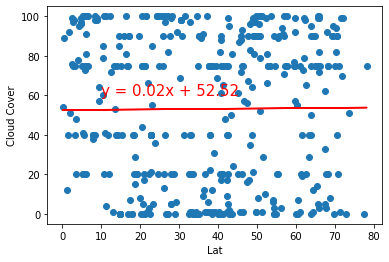

In [46]:
wd3=wd2[wd2['lat']>0]
x_values = wd3['lat']
y_values =wd3['Cloud Cover']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.ylabel('Cloud Cover')
plt.xlabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03255071781955058


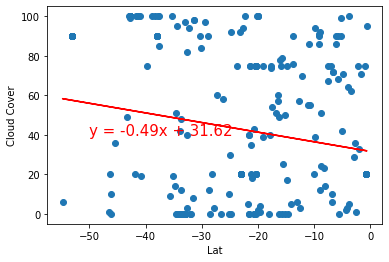

In [39]:
wd3=wd2[wd2['lat']<0]
x_values = wd3['lat']
y_values =wd3['Cloud Cover']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.ylabel('Cloud Cover')
plt.xlabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00028475316474135104


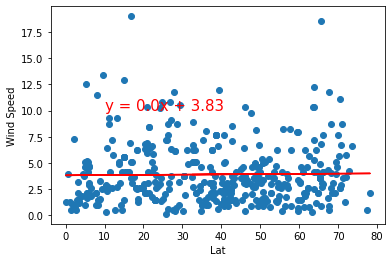

In [45]:
wd3=wd2[wd2['lat']>0]
x_values = wd3['lat']
y_values =wd3['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00028475316474135104


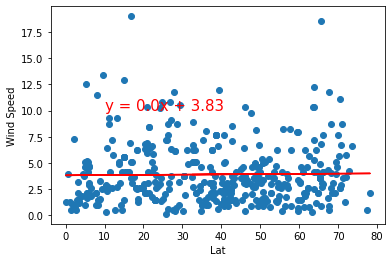

In [43]:
wd3=wd2[wd2['lat']>0]
x_values = wd3['lat']
y_values =wd3['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()